In [2]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [3]:
SSC_struct_rank_fil = "dat/asd.structures.expr.bias.rank"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True)
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)

In [4]:
print(g.vcount(), g.ecount())
print(g2.vcount(), g2.ecount())

213 3062
50 231


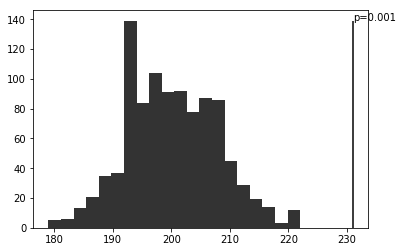

In [5]:
edge_permute_stat = 231
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=1000)
PlotPermutationP(g2_ecounts, edge_permute_stat)

In [6]:
(edge_permute_stat - np.mean(g2_ecounts))/np.std(g2_ecounts)
print(np.mean(g2_ecounts), np.std(g2_ecounts))

200.119 7.787864855016425


In [7]:
idx_top50nodes = [x.index for x in top_nodes]
Cohesiveness(g, idx_top50nodes, TopN=1)

1.0069707231538432

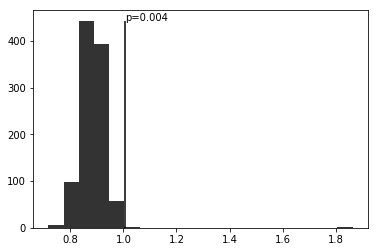

In [8]:
node_permute_stat = Cohesiveness(g, idx_top50nodes, TopN=1)
node_null = NodePermutation(g, top_nodes, node_permute_stat, Npermute=1000)
PlotPermutationP(node_null, node_permute_stat)

In [9]:
(node_permute_stat - np.mean(node_null))/np.std(node_null)

2.339335417026529

### SCZ

In [15]:
SSC_struct_rank_fil = "dat/scz.structures.expr.bias.rank"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True)
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)

In [16]:
print(g.vcount(), g.ecount())
print(g2.vcount(), g2.ecount())

213 3062
50 344


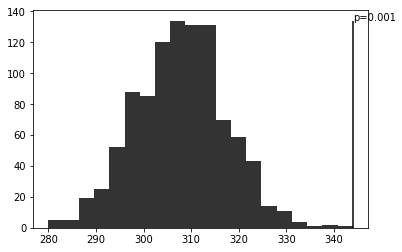

In [17]:
edge_permute_stat = 344
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=1000)
PlotPermutationP(g2_ecounts, edge_permute_stat)

In [18]:
(edge_permute_stat - np.mean(g2_ecounts))/np.std(g2_ecounts)

3.7994717889596776

In [19]:
idx_top50nodes = [x.index for x in top_nodes]
Cohesiveness(g, idx_top50nodes, TopN=1)

1.055190785281418

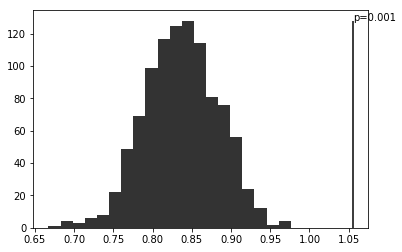

In [20]:
node_permute_stat = Cohesiveness(g, idx_top50nodes, TopN=1)
node_null = NodePermutation(g, top_nodes, node_permute_stat, Npermute=1000)
PlotPermutationP(node_null, node_permute_stat)

In [21]:
(node_permute_stat - np.mean(node_null))/np.std(node_null)

4.664140653935039

213 3062
50 348


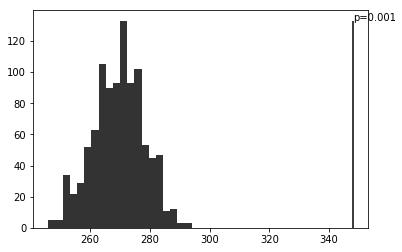

9.249189063920532


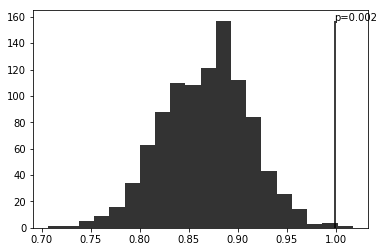

2.923848749120548


In [129]:
## Decile set
SSC_struct_rank_fil = "dat/scz.decile.rank.tsv"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True, columns=None)
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)
print(g.vcount(), g.ecount())
print(g2.vcount(), g2.ecount())

edge_permute_stat = g2.ecount()
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=1000)
PlotPermutationP(g2_ecounts, edge_permute_stat)
print((edge_permute_stat - np.mean(g2_ecounts))/np.std(g2_ecounts))

idx_top50nodes = [x.index for x in top_nodes]
print(Cohesiveness(g, idx_top50nodes, TopN=1))

node_permute_stat = Cohesiveness(g, idx_top50nodes, TopN=1)
node_null = NodePermutation(g, top_nodes, node_permute_stat, Npermute=1000)
PlotPermutationP(node_null, node_permute_stat)

print((node_permute_stat - np.mean(node_null))/np.std(node_null))

### null set

In [132]:
SSC_struct_rank_fil = "dat/scz.nulls/scz.structures.expr.bias.rank.null.5"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True, columns=["STR", "Bias"])
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)
print(g.vcount(), g.ecount())
print(g2.vcount(), g2.ecount())

213 3062
50 222


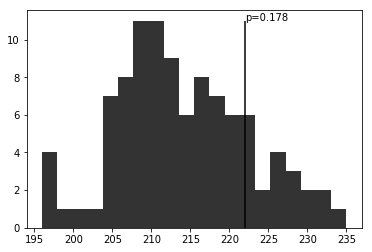

In [133]:
edge_permute_stat = g2.ecount()
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
PlotPermutationP(g2_ecounts, edge_permute_stat)

In [134]:
(edge_permute_stat - np.mean(g2_ecounts))/np.std(g2_ecounts)

0.9291666529368523

In [135]:
idx_top50nodes = [x.index for x in top_nodes]
Cohesiveness(g, idx_top50nodes, TopN=1)

0.8991213835890073

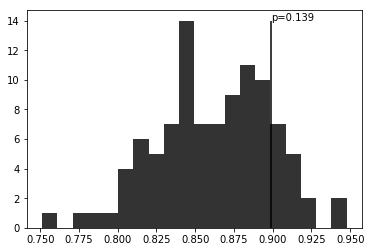

In [136]:
node_permute_stat = Cohesiveness(g, idx_top50nodes, TopN=1)
node_null = NodePermutation(g, top_nodes, node_permute_stat, Npermute=100)
PlotPermutationP(node_null, node_permute_stat)

In [138]:
(node_permute_stat - np.mean(node_null))/np.std(node_null)

1.0138197536793738

In [77]:
# Cohesiveness dist
Cohes = []
for i in range(1, 1001, 1):
    try:
        struct_rank_fil = "dat/scz.nulls/scz.structures.expr.bias.rank.null.{}".format(i)
        g, top_structs = LoadConnectome(struct_rank_fil, Bin=True, columns=["Structure", "Bias"])
        top_nodes = g.vs.select(label_in=top_structs)
        g2 = g.subgraph(top_nodes)
        idx_top50nodes = [x.index for x in top_nodes]
        conn = Cohesiveness(g, idx_top50nodes, TopN=1)
        Cohes.append(conn)
    except:
        print(i)

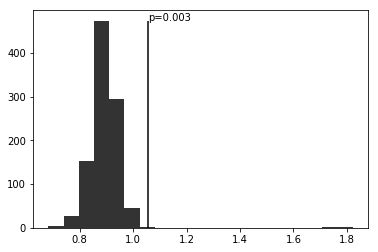

2.6403344719018476

In [122]:
PlotPermutationP(Cohes, 1.055190785281418)
(1.055190785281418 - np.mean(Cohes))/np.std(Cohes)

In [96]:
top1s, top10s, top25s, top50s = [],[],[],[]
for i in range(1, 1001, 1):
    struct_rank_fil = "dat/scz.nulls/scz.structures.expr.bias.rank.null.{}".format(i)
    df = pd.read_csv(struct_rank_fil, names=["Structure", "Bias"], delimiter="\t")
    biases = df["Bias"].values
    top1, top10, top25, top50 = biases[0],biases[9],biases[24],biases[49] 
    top1s.append(top1); top10s.append(top10); top25s.append(top25); top50s.append(top50) 

In [97]:
top1s[:10]

[0.207,
 0.191,
 0.19699999999999998,
 0.22899999999999998,
 0.262,
 0.193,
 0.218,
 0.174,
 0.19399999999999998,
 0.179]

In [111]:
struct_rank_fil = "dat/scz.structures.expr.bias.rank"
df = pd.read_csv(struct_rank_fil, names=["Structure", "Bias", "pvalue"], delimiter="\t")
biases = df["Bias"].values[:50]
top1, top10, top25, top50 = biases[0],biases[9],biases[24],biases[49] 

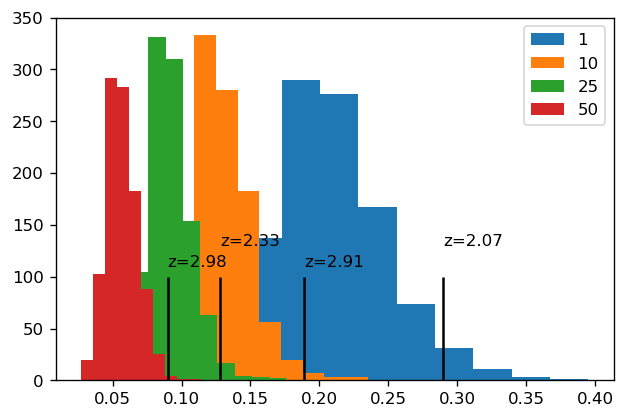

In [121]:
plt.figure(dpi=120)
for i, (label, tt, null) in enumerate(zip(["1", "10", "25", "50"], 
                             [top1, top10, top25, top50],
                             [top1s, top10s, top25s, top50s])):
    #PlotPermutationP(null, t)
    plt.hist(null, label=label)
    plt.vlines(x=tt, ymin=0, ymax=100, color="black")
    z=(tt - np.mean(null))/np.std(null)
    ff=10 * (-1)**(i)
    plt.text(x=tt, y=120+ff, s="z=%.2f"%(z))
    #plt.show()
plt.legend()
plt.show()

0.8578771936707019 0.04425145858807046


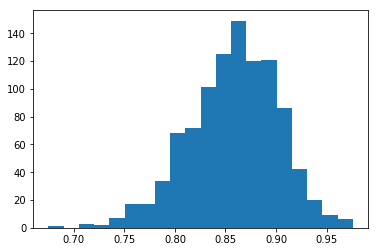

In [147]:
null2 = NodePermutation2(g)
plt.hist(null2, bins=20)
print(np.mean(null2), np.std(null2))

In [148]:
print(np.mean(null2), np.var(null2))

0.8578771936707019 0.001958191587171715


In [168]:
str_rank = pd.read_csv("dat/asd.ssc_vs_match.str.rank.tsv", delimiter="\t")
top50 = str_rank.head(50)["STR"].values
ConnMat = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv", index_col="ROW")
ConnMat = ConnMat[top50]
ConnMat = ConnMat.filter(items=top50, axis=0)
ConnMat = ConnMat.filter(items=top50, axis=1)
ConnMat.shape

(50, 50)

In [169]:
ssc_conns = ConnMat.values.flatten()

In [170]:
str_rank = pd.read_csv("dat/asd.sib_vs_match.str.rank.tsv", delimiter="\t")
top50 = str_rank.head(50)["STR"].values
ConnMat = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv", index_col="ROW")
ConnMat = ConnMat[top50]
ConnMat = ConnMat.filter(items=top50, axis=0)
ConnMat = ConnMat.filter(items=top50, axis=1)
ConnMat.shape
sib_conns = ConnMat.values.flatten()

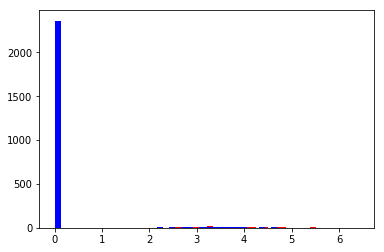

0.267	0.193	1.137e-02


In [176]:
plt.hist(ssc_conns, color="red", bins=50)
plt.hist(sib_conns, color="blue", bins=50)
plt.xlim()
plt.show()
t, p = scipy.stats.mannwhitneyu(ssc_conns, sib_conns, alternative='greater')
print("%.3f\t%.3f\t%.3e"%(np.mean(ssc_conns), np.mean(sib_conns), p))

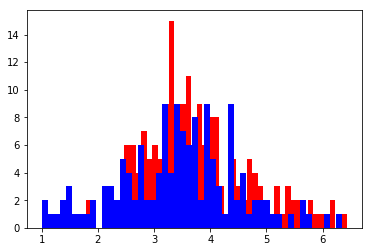

3.745	3.445	1.997e-02


In [179]:
ssc_conns_1 = [x for x in ssc_conns if x!=0]
sib_conns_1 = [x for x in sib_conns if x!=0]
plt.hist([x for x in ssc_conns if x!=0], color="red", bins=50)
plt.hist([x for x in sib_conns if x!=0], color="blue", bins=50)
plt.xlim()
plt.show()
t, p = scipy.stats.mannwhitneyu(ssc_conns_1, sib_conns_1, alternative='greater')
print("%.3f\t%.3f\t%.3e"%(np.mean(ssc_conns_1), np.mean(sib_conns_1), p))

In [269]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
ssc_rank = "dat/asd.ssc_vs_match.str.rank.tsv"
cont_rank = "dat/asd.sib_vs_match.str.rank.tsv"
ssc_conns, cont_conns = MWU_topN_conns(ssc_rank, cont_rank, ConnMatFil)
t, p = scipy.stats.mannwhitneyu(ssc_conns, cont_conns, alternative='greater')
print("%.3f\t%.3f\t%.3e"%(np.mean(ssc_conns), np.mean(cont_conns), p))

0.267	0.193	1.137e-02


In [270]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
spark_rank = "dat/asd.spark_vs_match.str.rank.tsv"
cont_rank = "dat/asd.sib_vs_match.str.rank.tsv"
spark_conns, cont_conns = MWU_topN_conns(spark_rank, cont_rank, ConnMatFil)
t, p = scipy.stats.mannwhitneyu(spark_conns, cont_conns, alternative='greater')
print("%.3f\t%.3f\t%.3e"%(np.mean(spark_conns), np.mean(cont_conns), p))

0.320	0.193	7.777e-06


In [271]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
tada_rank = "dat/asd.tada_vs_match.str.rank.tsv"
cont_rank = "dat/asd.sib_vs_match.str.rank.tsv"
tada_conns, cont_conns = MWU_topN_conns(tada_rank, cont_rank, ConnMatFil)
t, p = scipy.stats.mannwhitneyu(tada_conns, cont_conns, alternative='greater')
print("%.3f\t%.3f\t%.3e"%(np.mean(tada_conns), np.mean(cont_conns), p))

0.304	0.193	1.309e-06


ssc: 2.279e-02	spark: 4.036e-03	tada: 1.343e-09


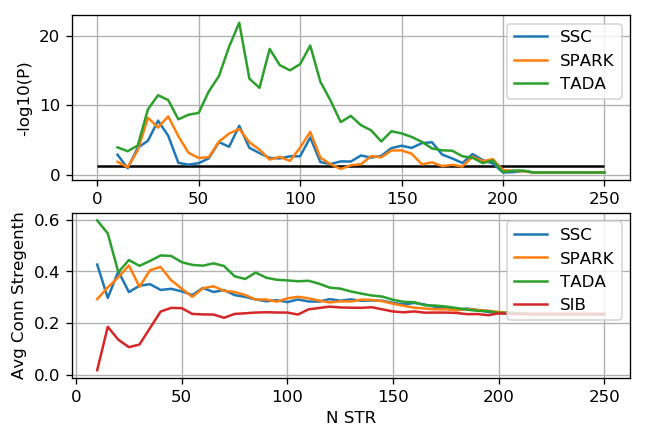

In [285]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
ssc_rank = "asd.ssc.quantilescore.rank.tsv"
spark_rank = "asd.spark.quantilescore.rank.tsv"
tada_rank = "asd.tada.quantilescore.rank.tsv"
cont_rank = "asd.sib.quantilescore.rank.tsv"
ShowConn(ConnMatFil, ssc_rank, spark_rank, tada_rank, cont_rank)

ssc: 1.230e-02	spark: 3.848e-01	tada: 3.497e-01


/Users/jiayao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4911: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


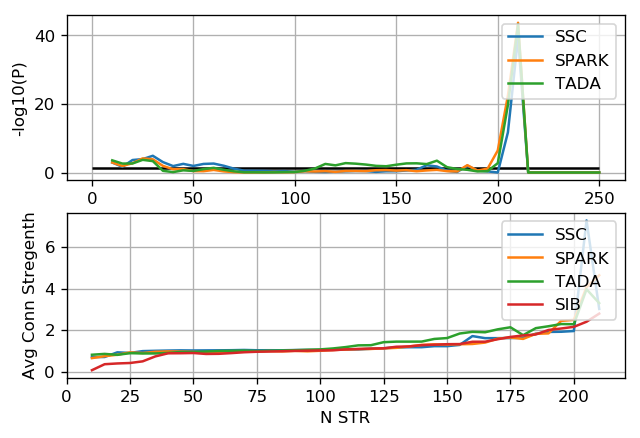

In [289]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
ssc_rank = "asd.ssc.quantilescore.rank.tsv"
spark_rank = "asd.spark.quantilescore.rank.tsv"
tada_rank = "asd.tada.quantilescore.rank.tsv"
cont_rank = "asd.sib.quantilescore.rank.tsv"
ShowConn(ConnMatFil, ssc_rank, spark_rank, tada_rank, cont_rank, mode="cohesiveness")

ssc: 2.425e-06	spark: 6.035e-11	tada: 2.315e-06


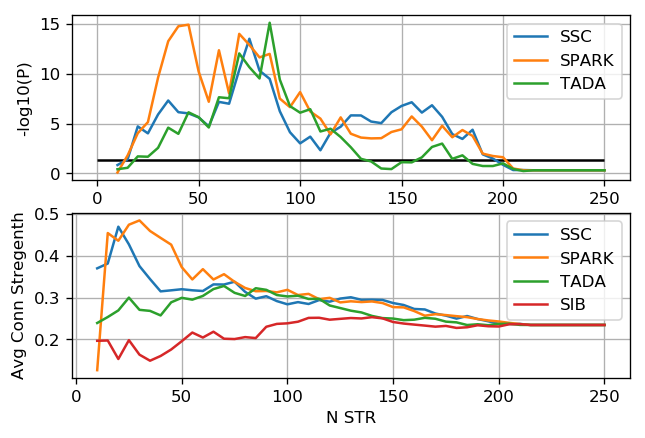

In [286]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
ssc_rank = "asd.weightscore.rank.tsv"
spark_rank = "asd.spark.weightscore.rank.tsv"
tada_rank = "asd.tada.weightscore.rank.tsv"
cont_rank = "asd.sib.weightscore.rank.tsv"
ShowConn(ConnMatFil, ssc_rank, spark_rank, tada_rank, cont_rank)

ssc: 1.094e-02	spark: 2.002e-01	tada: 8.285e-01


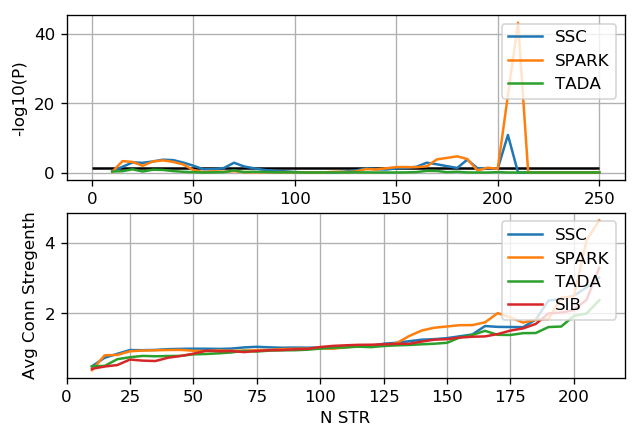

In [290]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
ssc_rank = "asd.weightscore.rank.tsv"
spark_rank = "asd.spark.weightscore.rank.tsv"
tada_rank = "asd.tada.weightscore.rank.tsv"
cont_rank = "asd.sib.weightscore.rank.tsv"
ShowConn(ConnMatFil, ssc_rank, spark_rank, tada_rank, cont_rank, mode="cohesiveness")

ssc: 2.049e-04	spark: 4.283e-07	tada: 6.349e-03


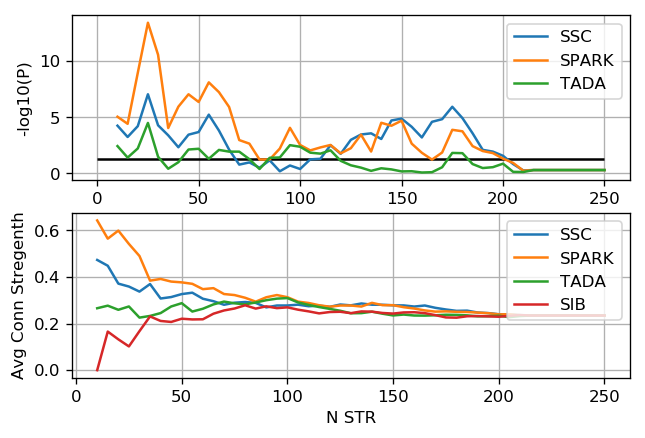

In [287]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
ssc_rank = "asd.ssc.decile.rank.tsv"
spark_rank = "asd.spark.decile.rank.tsv"
tada_rank = "asd.tada.decile.rank.tsv"
cont_rank = "asd.sib.decile.rank.tsv"
ShowConn(ConnMatFil, ssc_rank, spark_rank, tada_rank, cont_rank)

### SCZ RES

scz_gwas_qbias: 1.661e-10	scz_denovo_qbias: 1.524e-03	scz_psyencode_qbias: 2.077e-14


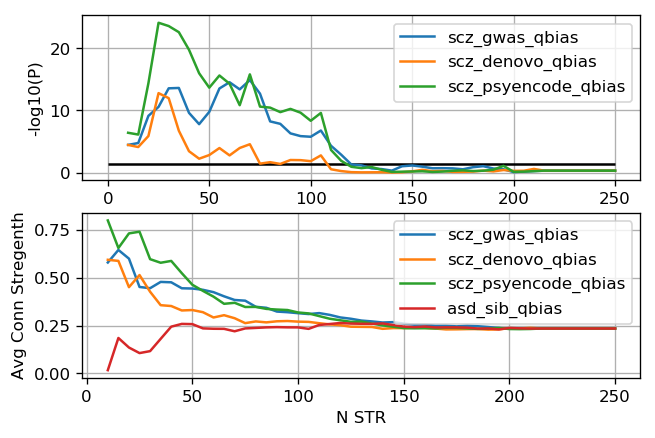

In [6]:
ConnMatFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/connectome-log.csv"
scz_gwas_qbias = "dat/bias/scz.gwas.quantilescore.rank.tsv"
scz_denovo_qbias = "dat/bias/scz.denovo.quantilescore.rank.tsv"
scz_psyencode_qbias = "dat/bias/scz.psyencode.quantilescore.rank.tsv"
asd_sib_qbias = "dat/bias/asd.sib.quantilescore.rank.tsv"
ShowConn(ConnMatFil, scz_gwas_qbias, scz_denovo_qbias, scz_psyencode_qbias, asd_sib_qbias, 
         labels=["scz_gwas_qbias", "scz_denovo_qbias", "scz_psyencode_qbias", "asd_sib_qbias"])